# Coral Analysis

In [1]:
import turicreate

In [2]:
import re

In [264]:
# summary = turicreate.SFrame('crossrefSummary.csv')
summary = turicreate.SFrame('scholarSummary.csv')

Finished parsing file /home/liz/coral/scholarSummary.csv

Parsing completed. Parsed 85 lines in 0.017516 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/liz/coral/scholarSummary.csv

Parsing completed. Parsed 85 lines in 0.017499 secs.

In [265]:
summary = summary[summary['Abstract'] != None]  # only search documents where abstract was found

### Search text for all Acropora species (species list taken from Acropora Wiki)

In [303]:
species_list = []
with open('acroporaSpecies.txt', 'r') as f:
    text = f.read()
    species_list = re.findall('(?<=\n)[A-Za-z]+ [a-z]+', text) # pull out species names only
len(species_list)

289

In [345]:
def searchSpecies(text):
    species_found = []
    for species in species_list:
        # e.g. search for Acropora digitifera or A. digitifera 
        #if species in text or re.search(species[0]+'[\.]? '+species.split(' ')[1], text):
        if species in text or re.search(species[0]+'[\.]? '+species.split(' ')[1], text):
            species_found.append(species)
    return species_found

In [346]:
summary['Species present'] = summary['Abstract'].apply(searchSpecies)
summary

ID,DOI,Title,Date
Science-Repository-Transforming-Growth- ...,10.31487/j.COR.2020.09.11,Transforming GrowthFactor Beta 1: Possible ...,"30 September, 2020"
2020.241-249,None,Characteristics ofAcropora divaricata and ...,07 February 2020
7-3-7-108,None,Staghorn coral (Genus-Acropora) of Elphinstone ...,None
Differential-bleaching-patterns-in-corals-of- ...,10.18520/cs/v114/i03/679-685 ...,Differential bleachingpatterns in corals of ...,None
Bioerosion-of-the-scleractinian-finger- ...,None,Bioerosion of thescleractinian finger ...,None
DESIGN-AND-IMPLEMENTATION-OF- ...,10.1175/1520-0426(2004)021<0331:NAMFRD>2.0.CO;2 ...,DESIGN AND IMPLEMENTATIONOF ELECTRONIC LOGGING ...,None
2020_Nielsen-etal-Physiological-effects ...,10.1007/s00338-019-01881-x) ...,Physiological effects ofheat and cold exposur ...,13 January 2020
Genotypic-inventory-of-Acropora-palmata-elkh ...,10.1007/s00227-003-1024-9,Genotypic inventory ofAcropora palmata (elk ...,January 2020
rachel_sandquist_poster,10.1186/1750-2187-8-7,None,None
245731,None,None,None


In [347]:
species_info = turicreate.SFrame({'Species': species_list})

# Count the number of papers referencing a given species
def totalPapersWithSpecies(species):
    return sum([species in species_pres for species_pres in summary['Species present']])
  
species_info['Total papers'] = species_info['Species'].apply(totalPapersWithSpecies)

### Most Commonly Studied Species

In [348]:
species_info = species_info.sort('Total papers', ascending=False)

In [349]:
species_info

Species,Total papers
Acropora palmata,5
Acropora humilis,4
Acropora cervicornis,4
Acropora millepora,3
Acropora digitifera,3
Acropora hyacinthus,3
Acropora muricata,3
Acropora gemmifera,2
Acropora cytherea,2
Acropora yongei,1


In [350]:
sum(species_info['Total papers'] > 0)  # count how many species appear at all in any paper
species_info[species_info['Total papers'] > 0]['Species']

dtype: str
Rows: ?
['Acropora palmata', 'Acropora humilis', 'Acropora cervicornis', 'Acropora millepora', 'Acropora digitifera', 'Acropora hyacinthus', 'Acropora muricata', 'Acropora gemmifera', 'Acropora cytherea', 'Acropora yongei', 'Montipora hispida', 'Acropora divaricata', 'Acropora horrida', 'Acropora clathrata', 'Acropora pharaonis', 'Acropora branchi', 'Acropora nasuta', 'Acropora tenella', 'Acropora valida', 'Acropora tenuis', 'Acropora aspera', 'Montipora cactus', ... ]

### Search text for all proteins on Uniprot for Acropora

In [281]:
def simplifyProteinName(protein_name):
    protein_name = re.sub(' \(.*\)', '', protein_name)  # remove anything in parentheses, unlikely to match
    protein_name = re.sub('  ', ' ', protein_name)  # get rid of double spaces
    return protein_name

def removeCommonGeneNames(gene_name):
    if len(gene_name) < 4 or re.match('[0-9\.]+', gene_name):
        gene_name = None
    return gene_name

In [282]:
swissprot = turicreate.SFrame.read_csv('swissprot_all.tab', '\t')
swissprot = swissprot.rename({'Gene names  (primary )':'Gene names'})
swissprot['Protein names'] = swissprot['Protein names'].apply(simplifyProteinName)  # make names more searchable
swissprot['Gene names'] = swissprot['Gene names'].apply(removeCommonGeneNames)  # some gene names are common words
swissprot = swissprot['Protein names', 'Gene names'].unique()  # remove duplicates
swissprot = swissprot.swap_columns('Protein names', 'Gene names')
summary = summary[summary['Language'] == 'en']  # only search documents written in english
summary

Successfully parsed 3 tokens: 
	0: Q58251
	1: reviewed
	2: [Methyl-co ... C 2.1.1.-)

Successfully parsed 3 tokens: 
	0: A0A5Q0MUT1
	1: reviewed
	2: [Thr6, Val ... hyllokinin

Successfully parsed 3 tokens: 
	0: L0PJV8
	1: reviewed
	2: [Thr6]-bra ... radykinin]

Successfully parsed 3 tokens: 
	0: P86629
	1: reviewed
	2: [Thr6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86815
	1: reviewed
	2: [Ala1,Thr6 ... ys,Ala,Val

Successfully parsed 3 tokens: 
	0: P86812
	1: reviewed
	2: [Ala1,Thr6 ... bradykinin

Successfully parsed 3 tokens: 
	0: P86814
	1: reviewed
	2: [Ala1,Thr6 ... yl-Ser,Lys

Successfully parsed 3 tokens: 
	0: P86035
	1: reviewed
	2: [Asp6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86818
	1: reviewed
	2: [Ala1,Thr6 ... hyllokinin

Successfully parsed 3 tokens: 
	0: P84896
	1: reviewed
	2: [Thr6]-bradykinin

40 lines failed to parse correctly

Finished parsing file /home/liz/coral/swissprot_all.tab

Parsing completed. Parsed 100 lines in 0.434032 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 3 tokens: 
	0: Q58251
	1: reviewed
	2: [Methyl-co ...  2.1.1.-)

Successfully parsed 3 tokens: 
	0: A0A5Q0MUT1
	1: reviewed
	2: [Thr6, Val ... yllokinin

Successfully parsed 3 tokens: 
	0: P86814
	1: reviewed
	2: [Ala1,Thr6 ... l-Ser,Lys

Successfully parsed 3 tokens: 
	0: P86035
	1: reviewed
	2: [Asp6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86818
	1: reviewed
	2: [Ala1,Thr6 ... yllokinin

Successfully parsed 3 tokens: 
	0: L0PJV8
	1: reviewed
	2: [Thr6]-bra ... adykinin]

Successfully parsed 3 tokens: 
	0: P86629
	1: reviewed
	2: [Thr6]-bradykinin

Successfully parsed 3 tokens: 
	0: P86815
	1: reviewed
	2: [Ala1,Thr6 ... s,Ala,Val

Successfully parsed 3 tokens: 
	0: Q9X0Z6
	1: reviewed
	2: [FeFe] hyd ...  1.8.-.-)

Successfully parsed 3 tokens: 
	0: P86812
	1: reviewed
	2: [Ala1,Thr6 ... radykinin

Read 531163 lines. Lines per second: 1.37776e+06

43 lines failed to parse correctly

Finished parsing file /home/liz/coral/swissprot_all.tab

Parsing completed. Parsed 563929 lines in 0.398134 secs.

ID,DOI,Title,Date
Science-Repository-Transforming-Growth- ...,10.31487/j.COR.2020.09.11,Transforming GrowthFactor Beta 1: Possible ...,"30 September, 2020"
2020.241-249,None,Characteristics ofAcropora divaricata and ...,07 February 2020
7-3-7-108,None,Staghorn coral (Genus-Acropora) of Elphinstone ...,None
Differential-bleaching-patterns-in-corals-of- ...,10.18520/cs/v114/i03/679-685 ...,Differential bleachingpatterns in corals of ...,None
Bioerosion-of-the-scleractinian-finger- ...,None,Bioerosion of thescleractinian finger ...,None
DESIGN-AND-IMPLEMENTATION-OF- ...,10.1175/1520-0426(2004)021<0331:NAMFRD>2.0.CO;2 ...,DESIGN AND IMPLEMENTATIONOF ELECTRONIC LOGGING ...,None
2020_Nielsen-etal-Physiological-effects ...,10.1007/s00338-019-01881-x) ...,Physiological effects ofheat and cold exposur ...,13 January 2020
Genotypic-inventory-of-Acropora-palmata-elkh ...,10.1007/s00227-003-1024-9,Genotypic inventory ofAcropora palmata (elk ...,January 2020
rachel_sandquist_poster,10.1186/1750-2187-8-7,None,None
245731,None,None,None


In [275]:
def searchGenes(text):
    print(".", end="")
    gene_list = []
    for gene in swissprot:
        gene_name = gene['Gene names']
        protein_name = gene['Protein names']
        if protein_name in text:
            gene_list.append(protein_name)  # found match
        elif gene_name:
            gene_name = re.sub(r'\\', r'\\\\', gene_name)  # escape any backslash characters in gene names
            reg = re.compile('(?<=[^a-zA-Z])'+gene_name+'(?=[^a-zA-Z])') # don't let the gene name be part of a word
            if re.search(reg, text):
                gene_list.append(gene_name)
    return gene_list


In [283]:
# This takes a few minutes
summary['Genes present'] = summary['Abstract'].apply(searchGenes)
summary.materialize()

....................................................................

In [284]:
summary

ID,DOI,Title,Date
Science-Repository-Transforming-Growth- ...,10.31487/j.COR.2020.09.11,Transforming GrowthFactor Beta 1: Possible ...,"30 September, 2020"
2020.241-249,None,Characteristics ofAcropora divaricata and ...,07 February 2020
7-3-7-108,None,Staghorn coral (Genus-Acropora) of Elphinstone ...,None
Differential-bleaching-patterns-in-corals-of- ...,10.18520/cs/v114/i03/679-685 ...,Differential bleachingpatterns in corals of ...,None
Bioerosion-of-the-scleractinian-finger- ...,None,Bioerosion of thescleractinian finger ...,None
DESIGN-AND-IMPLEMENTATION-OF- ...,10.1175/1520-0426(2004)021<0331:NAMFRD>2.0.CO;2 ...,DESIGN AND IMPLEMENTATIONOF ELECTRONIC LOGGING ...,None
2020_Nielsen-etal-Physiological-effects ...,10.1007/s00338-019-01881-x) ...,Physiological effects ofheat and cold exposur ...,13 January 2020
Genotypic-inventory-of-Acropora-palmata-elkh ...,10.1007/s00227-003-1024-9,Genotypic inventory ofAcropora palmata (elk ...,January 2020
rachel_sandquist_poster,10.1186/1750-2187-8-7,None,None
245731,None,None,None


In [285]:
def totalPapersWithGene(gene_record):
    total_papers = 0
    protein_name = gene_record['Protein names']
    gene_name = gene_record['Gene names']
    for gene_list in summary['Genes present']:
        if protein_name in gene_list or gene_name in gene_list:
            total_papers += 1
    return total_papers

In [286]:
gene_info = swissprot
gene_info['Total papers'] = gene_info.apply(totalPapersWithGene)
gene_info.materialize()
gene_info = gene_info.sort('Total papers', ascending=False)
totalPapersContainingGenes = sum(len(gene_list) > 0 for gene_list in summary['Genes present'])
gene_info[gene_info['Total papers'] > 0]['Gene names']

dtype: str
Rows: ?
['term', 'DNMT3B', 'DRM1', 'CMT2', 'DNMT', 'Dnmt3c', 'DRM2', 'ZMET5', 'MET3', 'DRM1A', 'spring', 'MET1A', 'MET1B', 'DNMT3A', 'Dnmt1', 'MET4', 'Dnmt3a', 'DNMT1', 'MET2', 'CMT3', 'MET2A', 'dnmA', 'Dnmt3b', 'DMT105', 'DMT1', 'CMT1', 'Clock', 'ACT1', 'EPGN', 'npmA', 'Epgn', 'rmtB', 'TGFB1', 'actA', 'impact', 'dome', None, 'rmtC', 'sand', 'act1', 'NOP2C', 'kamB', None, 'fmrO', 'ACT1; ACT2', 'moon', 'mesh', None, 'ball', 'impact', ... ]

### Find loose matches hiding in a phrase like "wnt-like genes" or "ras-related proteins"

In [287]:
def findPossibleGeneTerms(text):
    return re.findall('\w+(?=-related|-like)', text)

In [288]:
summary['Possible gene terms'] = summary['Abstract'].apply(findPossibleGeneTerms)
summary[summary['Possible gene terms']]


ID,DOI,Title,Date,Keywords
Bioerosion-of-the-scleractinian-finger- ...,None,Bioerosion of thescleractinian finger ...,None,"Phone no ScleractinianCoral,Acropora humili ..."
rachel_sandquist_poster,10.1186/1750-2187-8-7,None,None,None
Lineages-of-Acropora-staghorn-corals-in-the- ...,10.4435/BSPI.2020.15,Lineages of Acropora(staghorn) corals in the ...,None,"Acroporidae,SuwanneeLimestone,Arcadia ..."
Abstract,Language,Species present,Genes present,Possible gene terms
Bioerosion by boringorganisms is one of the ...,en,"{'abrolhosensis': 0,'abrotanoides': 0, ...",[],[scale]
Discussion o Thirty-sevenpotential TRAF homologs ...,en,"{'abrolhosensis': 0,'abrotanoides': 0, ...",[F protein],[NOD]
The staghorn coral genusAcropora is the most ...,en,"{'abrolhosensis': 0,'abrotanoides': 0, ...",[],[lip]


## TF-IDF K-Means Clustering and Nearest Neighbors
### (interesting though maybe not useful)

In [255]:
def wordsOnly(text):
    text = re.sub(',', ' ', text)
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [256]:
summary = summary[summary['Language'] == 'en']
summary['Abstract_Words_Only'] = summary['Abstract'].apply(wordsOnly)

In [257]:
summary['tfidf'] = turicreate.text_analytics.tf_idf(summary['Abstract_Words_Only'])
summary['tfidf']

dtype: dict
Rows: 14
[{'only': 1.252762968495368, 'while': 1.252762968495368, 'its': 2.6390573296152584, 'june': 1.540445040947149, 'april': 3.8918202981106265, 'also': 1.9459101490553132, 'extends': 2.6390573296152584, 'same': 1.9459101490553132, 'month': 5.278114659230517, 'begins': 2.6390573296152584, 'extended': 5.278114659230517, 'starts': 5.278114659230517, 'where': 2.6390573296152584, 'southern': 2.6390573296152584, 'than': 3.088858251543474, 'later': 2.6390573296152584, 'months': 4.621335122841447, 'two': 2.505525936990736, 'gonads': 3.8918202981106265, 'annually': 2.6390573296152584, 'early': 3.080890081894298, 'immatures': 2.6390573296152584, 'activities': 2.6390573296152584, 'were': 0.6729444732424258, 'diving': 2.6390573296152584, 'was': 1.3254982568371176, 'verrucosa': 21.112458636922067, 'phosphate': 5.278114659230517, 'least': 2.6390573296152584, 'as': 0.6931471805599453, 'spawners': 2.6390573296152584, 'july': 2.6390573296152584, 'differences': 2.6390573296152584, 'thos

### Determine which article is the nearest neighbor of a given article (based on TF-IDF in abstract)

In [258]:
nn_model = turicreate.nearest_neighbors.create(summary, features=['tfidf'], label='ID')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [259]:
nn_model.query(summary[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 7.14286     | 225us        |

| Done         |         | 100         | 409us        |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,10.21275_v5i1.nov152970,0.0,1
0,10.35800_jplt.7.3.2019.24499 ...,0.8532608695652174,2
0,10.21608_ejabf.2020.97537,0.8617886178861789,3
0,10.35800_jasm.0.0.2014.7295 ...,0.872093023255814,4
0,10.3354_meps121203,0.880184331797235,5


### Plot SSE to determine reasonable number of clusters

In [260]:
sses = []
for k in range(1, len(summary)):
    model = turicreate.kmeans.create(summary, features=['tfidf'], num_clusters=k)
    sses.append(sum(model.cluster_info['sum_squared_distance']))

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 0         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 8         |

| 1             | 1         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 12        |

| 1             | 2         |

| 2             | 5         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 2         |

| 1             | 13        |

| 2             | 5         |

| 3             | 8         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 12        |

| 1             | 3         |

| 2             | 4         |

| 3             | 10        |

| 4             | 0         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 10        |

| 1             | 0         |

| 2             | 11        |

| 3             | 8         |

| 4             | 13        |

| 5             | 3         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 0         |

| 1             | 1         |

| 2             | 8         |

| 3             | 13        |

| 4             | 12        |

| 5             | 6         |

| 6             | 3         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 0         |

| 1             | 4         |

| 2             | 7         |

| 3             | 11        |

| 4             | 13        |

| 5             | 5         |

| 7             | 2         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 4         |

| 1             | 10        |

| 2             | 11        |

| 3             | 0         |

| 4             | 7         |

| 5             | 13        |

| 8             | 6         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 0         |

| 1             | 12        |

| 2             | 2         |

| 3             | 7         |

| 4             | 11        |

| 5             | 6         |

| 9             | 8         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 13        |

| 1             | 6         |

| 2             | 8         |

| 3             | 3         |

| 4             | 4         |

| 5             | 5         |

| 10            | 12        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 11        |

| 1             | 1         |

| 2             | 7         |

| 3             | 0         |

| 4             | 3         |

| 5             | 6         |

| 10            | 4         |

| 11            | 5         |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 2         |

| 1             | 4         |

| 2             | 6         |

| 3             | 0         |

| 4             | 8         |

| 5             | 13        |

| 10            | 11        |

| 12            | 10        |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 0                             |

+-----------+-------------------------------+

In [261]:
from matplotlib import pyplot as plt

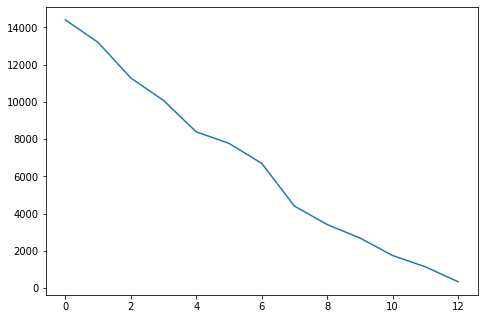

In [262]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(range(len(sses)),sses)

### Manually choose k, perform K-Means clustering

In [263]:
k = 15
kmeans_model = turicreate.kmeans.create(summary, features=['tfidf'], num_clusters=k)

ValueError: The desired number of clusters exceeds the number of data points. Please set 'num_clusters' to be smaller than the number of data points.

In [56]:
kmeans_model.cluster_info.print_rows(num_rows=k)

+-------------------------------+------------+------+----------------------+
|             tfidf             | cluster_id | size | sum_squared_distance |
+-------------------------------+------------+------+----------------------+
| {'a': 2.3052365861183235, ... |     0      |  1   |         0.0          |
| {'a': 0.11526182930591618,... |     1      |  2   |  769.5118408203125   |
| {'a': 0.6698234608721167, ... |     2      |  53  |  146310.2216644287   |
| {'a': 0.9220946344473294, ... |     3      |  1   |         0.0          |
| {'a': 1.1526182930591617, ... |     4      |  1   |         0.0          |
| {'a': 3.4578548791774852, ... |     5      |  1   |         0.0          |
| {'a': 1.1526182930591617, ... |     6      |  1   |         0.0          |
| {'a': 0.23052365861183235,... |     7      |  1   |         0.0          |
| {'access': 4.2195077051761... |     8      |  1   |         0.0          |
| {'a': 0.9220946344473294, ... |     9      |  1   |         0.0          |

### What are the top 10 words defining a cluster?

In [57]:
info = kmeans_model.cluster_info
for k in range(0, len(info)):
    cluster = info[info['cluster_id'] == k]
    top_words_tfidf = cluster[['tfidf']].stack('tfidf', new_column_name=['word','tfidf']).sort('tfidf', ascending=False)
    top_words = top_words_tfidf['word'][0:10]
    print(f"Cluster {k}")
    print(top_words)

Cluster 0
['dmsp', 'indirect', 'hsgcms', 'store', 'aspera', 'concentrations', 'gave', 'dms', 'chromatography', 'lcms']
Cluster 1
['belitung', 'bangka', 'island', 'islands', 'tin', 'threatened', 'coastal', 'mining', 'mangrove', 'seagrass']
Cluster 2
['semantic', 'corals', 'gulf', 'bleaching', 'w', 'were', 'space', 'at', 'm', 'growth']
Cluster 3
['radial', 'corallites', 'coenosteum', 'atlantic', 'spinules', 'sized', 'evenly', 'simple', 'tubular', 'branch']
Cluster 4
['introgression', 'evolutionary', 'roles', 'chapter', 'duplication', 'i', 'diversification', 'dominance', 'rise', 'genome']
Cluster 5
['srca', 'interbranch', 'climate', 'reconstructions', 'cores', 'gbr', 'porites', 'skeleton', 'reconstruction', 'slope']
Cluster 6
['methylation', 'epigenetic', 'dna', 'changes', 'variation', 'modifications', 'seasonal', 'responses', 'consistent', 'these']
Cluster 7
['setosum', 'diadema', 'gonad', 'vitamin', 'compounds', 'elements', 'mg', 'nutrient', 'content', 'potency']
Cluster 8
['ne', 'nw', 